In [49]:
import pandas as pd

X_train=pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')

In [13]:
X_train

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,9.592,0.770,64.12,0.672,-0.1680,0.699,0.6190,0.242,False,True,False,False,False,False,False,False,False,False
1,10.669,0.937,72.60,0.841,-0.1490,0.608,0.7540,0.253,False,False,False,False,False,False,False,False,False,True
2,11.065,0.926,64.44,0.819,0.0070,0.675,0.7180,0.252,False,False,False,False,True,False,False,False,False,False
3,9.423,0.892,65.00,0.824,-0.0840,0.929,0.5820,0.270,False,True,False,False,False,False,False,False,False,False
4,10.745,0.935,69.90,0.924,-0.0065,0.598,0.7960,0.260,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,11.114,0.862,67.30,0.911,0.1290,0.347,0.7930,0.284,False,False,False,False,True,False,False,False,False,False
1674,9.186,0.877,67.50,0.890,-0.1370,0.884,0.7605,0.240,False,False,False,True,False,False,False,False,False,False
1675,8.730,0.607,59.70,0.886,-0.0420,0.781,0.6820,0.318,False,False,False,False,False,False,True,False,False,False
1676,10.816,0.840,76.82,0.922,0.2960,0.274,0.7190,0.237,False,False,True,False,False,False,False,False,False,False


In [50]:
#Ici nous standardisons les données

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

cols=['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect']

X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])

In [18]:
#Une fois les données standardisés on peut lancer les modélisations de regressions

In [19]:
#REGRESSION LINEAIRE

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
#Plus les score sont proche de 1 plus les données collent à la droite de regression lineaire
#Ici on est sur du 80% cest qui est assez important on peut supposer que la regression linéaire semble assez approprié

print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.7880753001800223
0.8047390597356208


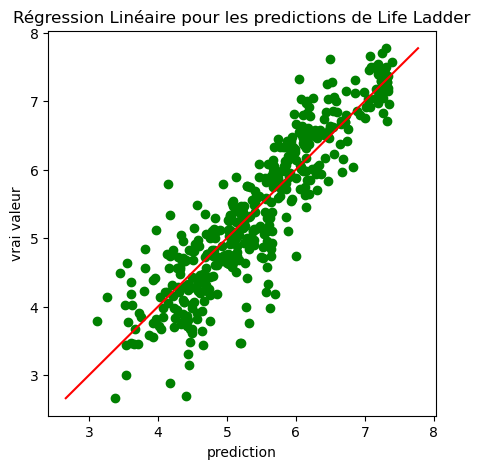

In [24]:
import matplotlib.pyplot as plt

#On fait la prediction que l'on stock dans la variable pred_test
pred_test = regressor.predict(X_test)

#On fait un nuage de point avec les prédictions y du test pour abssice et les vrai valeurs de y_test en ordonnées  
fig = plt.figure(figsize = (5,5))
plt.scatter(pred_test, y_test, c='green')

#on fait une droite de regression avec les vraies valeurs de y_test en absices et les meme valeurs en ordonnées  
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')

#Titres
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire pour les predictions de Life Ladder')

plt.show()

In [27]:
#ARBRE DE DECISION POUR LA REGRESSION

from sklearn.tree import DecisionTreeRegressor 
  
dtr = DecisionTreeRegressor(random_state=42) 
  
dtr.fit(X_train, y_train)

#On observe un réel overfitting
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

1.0
0.7815489609885337


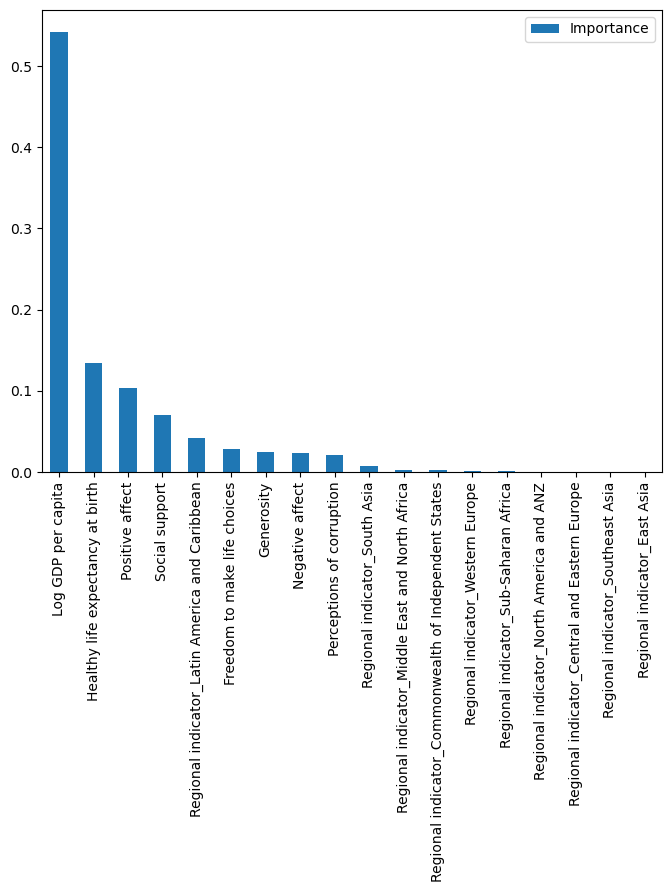

In [32]:
#On affiche l'importance des variables et on remarque que les variables qu'on a vue dans la heatmap ayant une forte crrelatiion
#sont celles qui ont le plus d'importance

import matplotlib.pyplot as plt
%matplotlib inline

importance= pd.DataFrame(dtr.feature_importances_,index=X_train.columns,columns=["Importance"])
importance.sort_values(by='Importance',ascending=False,inplace=True)
importance.plot(kind='bar',figsize=(8,6));

In [31]:
#Essayons de réentrainer le modele en ne gardant que les variables explicatives les plus importantes

from sklearn.tree import DecisionTreeRegressor 

X_train_reduced = X_train[['Log GDP per capita','Social support','Healthy life expectancy at birth','Positive affect']]
X_test_reduced = X_test[['Log GDP per capita','Social support','Healthy life expectancy at birth','Positive affect']]

regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train_reduced , y_train)

print(regressor.score(X_train_reduced,y_train))
print(regressor.score(X_test_reduced,y_test))

#On remarque que cela n'améliore pas le score au contraire

1.0
0.6932313398175075


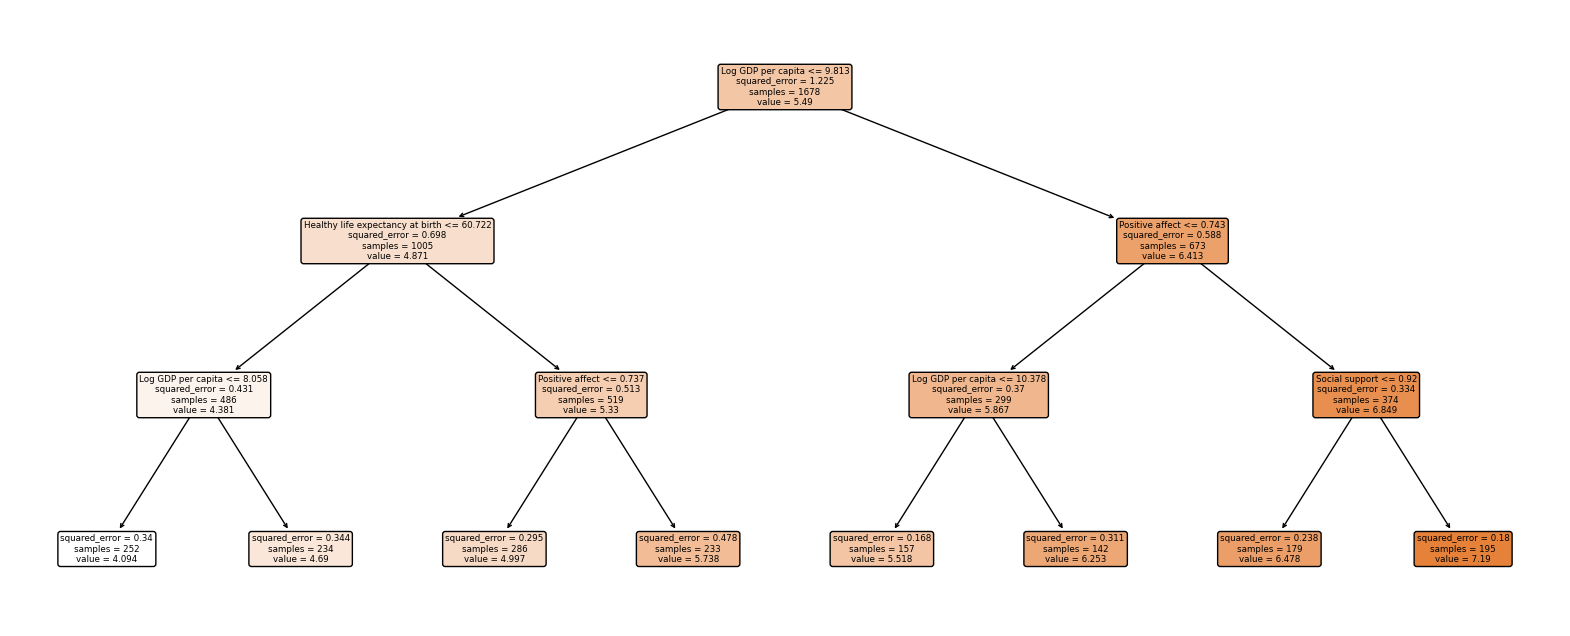

In [47]:
#On affiche l'arbre de regression pour comprednre comment il fonctionne.
from sklearn.tree import plot_tree # tree diagram

X_train_unscaled = X_train.copy()

cols=['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect']

# On rescale les données pour l'affichage 
X_train_unscaled[cols] = scaler.inverse_transform(X_train_unscaled[cols])

regressor = DecisionTreeRegressor(random_state=42, max_depth = 3) 
  
X_train_unscaled_reduce = X_train_unscaled[cols]
    

regressor.fit(X_train_unscaled_reduce, y_train)

fig, ax = plt.subplots(figsize=(20, 8))  

plot_tree(regressor, 
          feature_names = cols, 
          filled = True, 
          rounded = True)

plt.show()

#On voit que son calcul se fait premierement grâce au PIB par habitant, il sépare les pays ayant un PIB>9.8 et <=9.8 en deux groupes

In [52]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

# Instanciation du modèle
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

C:\Users\user\anaconda4\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [54]:
#Testons le score du modele 

print(rf_model.score(X_train,y_train))
print(rf_model.score(X_test,y_test))

#Pour le moment il s'agit du plus performant pour la regression

0.9837067046165342
0.8793747653662247
